In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt

# SQLAlchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

import psycopg2

from config_file import password


# Read the filtered data and merge the two tables
(Filtered data: all dates would be the first of the month, like YYYY/MM/01) 

In [2]:
conn = psycopg2.connect(user="postgres",
                       password=password,
                       host="localhost",
                       port="5432",
                       database="FinalProject")

In [3]:
cursor = conn.cursor()

In [4]:
cpi_df = pd.read_sql("select * from food_cpi_match",conn)

In [5]:
cpi_df.head()

,date,CPI
0,1995-01-01,147.0
1,1995-02-01,147.7
2,1995-03-01,147.1
3,1995-04-01,148.7
4,1995-05-01,148.7


In [6]:
cpi_df.dtypes

date     object
CPI     float64
dtype: object

In [7]:
cpi_df["date"] = pd.to_datetime(cpi_df["date"])

In [8]:
cpi_df.dtypes

date    datetime64[ns]
CPI            float64
dtype: object

In [9]:
gas_df = pd.read_sql("select * from gas_prices_match",conn)

In [10]:
gas_df.head()

,date,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-02-01,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
2,1995-03-01,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
3,1995-04-01,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
4,1995-05-01,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [11]:
gas_df["date"]=pd.to_datetime(gas_df["date"])

In [12]:
gas_df["date"].dtypes

dtype('<M8[ns]')

In [13]:
#change gas_df['Date'] datatype
gas_df['date'] = gas_df['date'].astype('datetime64[ns]')

In [14]:
gas_df.dtypes

date                          datetime64[ns]
all_grades_all_formulation           float64
all_grades_conventional              float64
all_grades_refomulated               float64
regular_all_formulation              float64
regular_conventional                 float64
regular_reformulated                 float64
midgrade_all_formulation             float64
midgrade_conventional                float64
midgrade_reformulated                float64
premium_all_formulation              float64
premium_conventional                 float64
premium_reformulated                 float64
no_2_diesel                          float64
dtype: object

In [15]:
# Merge the two dataframes
cpi_gas_df=cpi_df.merge(gas_df,on="date",how="inner")
cpi_gas_df.tail()


,date,CPI,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
308,2020-09-01,251.303,2.302,2.193,2.518,2.211,2.122,2.405,2.624,2.481,2.836,2.872,2.758,3.008,2.435
309,2020-10-01,251.478,2.262,2.161,2.464,2.172,2.091,2.349,2.583,2.442,2.793,2.833,2.723,2.965,2.387
310,2020-11-01,251.241,2.204,2.092,2.430,2.112,2.021,2.314,2.533,2.378,2.765,2.786,2.661,2.936,2.372
311,2020-12-01,252.009,2.246,2.133,2.469,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
312,2021-01-01,252.270,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640


# Exploring the data
Create three line graphs for CPI, gas price, and CPI and gas price

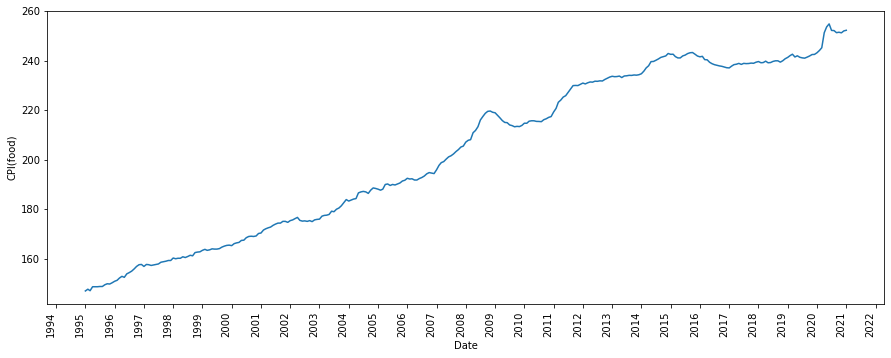

In [16]:
import numpy as np
# See the trend of food_cpi 
x_axis=cpi_df["date"]
y_axis=cpi_df["CPI"]
plt.subplots(figsize=(15,6))
plt.plot(x_axis,y_axis)
plt.xlabel("Date")
plt.ylabel("CPI(food)")

locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

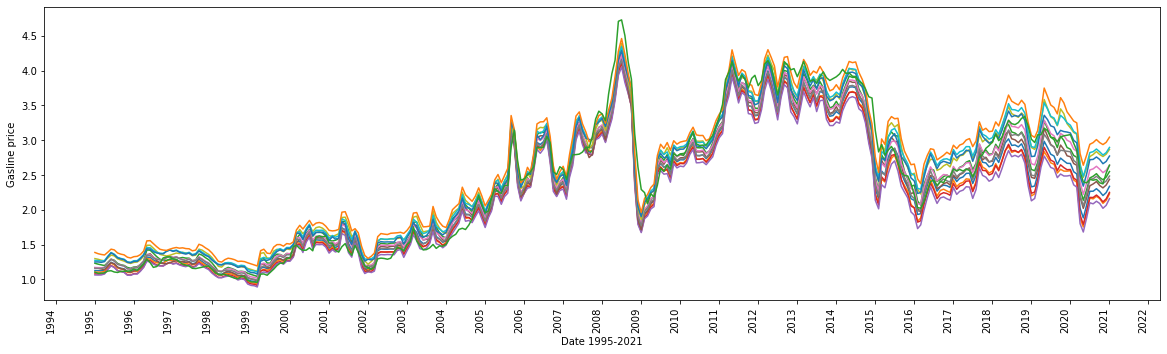

In [17]:
# See the trend of gas_price
x_axis=gas_df["date"]
A1_axis=gas_df["all_grades_all_formulation"]
A2_axis=gas_df["all_grades_conventional"]
A3_axis=gas_df["all_grades_refomulated"]
R1_axis=gas_df["regular_all_formulation"]
R2_axis=gas_df["regular_conventional"]
R3_axis=gas_df["regular_reformulated"]
M1_axis=gas_df["midgrade_all_formulation"]
M2_axis=gas_df["midgrade_conventional"]
M3_axis=gas_df["midgrade_reformulated"]
P1_axis=gas_df["premium_all_formulation"]
P2_axis=gas_df["premium_conventional"]
P3_axis=gas_df["premium_reformulated"]
D_axis=gas_df["no_2_diesel"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,A1_axis)
plt.plot(x_axis,A2_axis)
plt.plot(x_axis,A3_axis)
plt.plot(x_axis,R1_axis)
plt.plot(x_axis,R2_axis)
plt.plot(x_axis,R3_axis)
plt.plot(x_axis,M1_axis)
plt.plot(x_axis,M2_axis)
plt.plot(x_axis,M3_axis)
plt.plot(x_axis,P1_axis)
plt.plot(x_axis,P2_axis)
plt.plot(x_axis,P3_axis)
plt.plot(x_axis,D_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("Gasline price")

locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

In [18]:
gas_types=gas_df[gas_df["date"]=="1995-01-01"].drop("date",1)
gas_types

C:\Users\defen\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,1.127,1.104,1.231,1.079,1.063,1.167,1.17,1.159,1.298,1.272,1.25,1.386,1.104


In [19]:
# Extract price from gas_type
price=gas_types.values[0]

In [20]:
# Get all names from the gas
names=gas_types.columns
names

Index(['all_grades_all_formulation', 'all_grades_conventional',
       'all_grades_refomulated', 'regular_all_formulation',
       'regular_conventional', 'regular_reformulated',
       'midgrade_all_formulation', 'midgrade_conventional',
       'midgrade_reformulated', 'premium_all_formulation',
       'premium_conventional', 'premium_reformulated', 'no_2_diesel'],
      dtype='object')

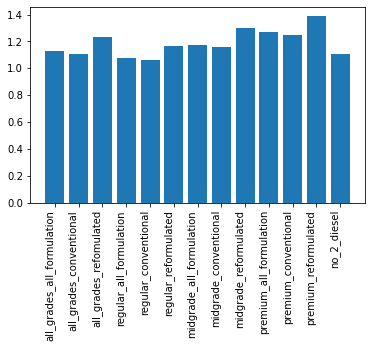

In [21]:
# Create a bar chart to get an general idea of the gas price for each type.
# premium_reformulated is most expensive
plt.bar(names,price)
plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

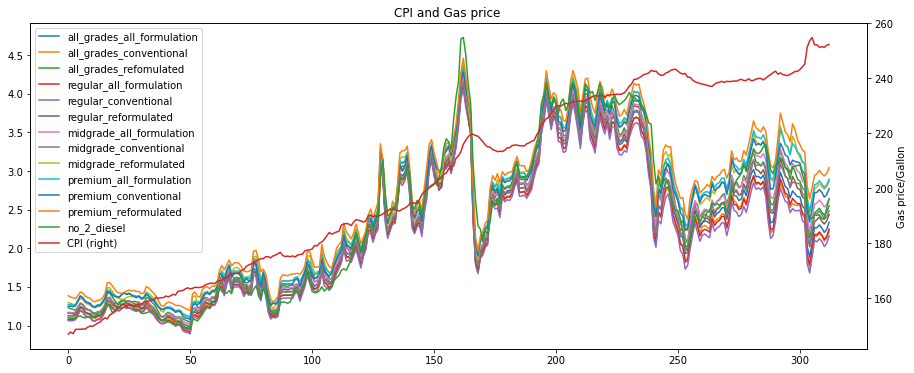

In [22]:
# CPI and gas price graph

ax = cpi_gas_df.loc[:,"all_grades_all_formulation":"no_2_diesel"].plot(legend=True, figsize=(15,6))

ax = cpi_gas_df[["CPI"]].plot(secondary_y=True, ax=ax, legend=True)
ax.set_title('CPI and Gas price ')
_ = ax.set_ylabel('CPI')
ax.set_ylabel('Gas price/Gallon')

plt.show()

CPI is in hundreds so we divid it with 100  - manually scale it to the level of gas price. Then we put them in the graph to see the trend of these two data.

In [23]:
# Change CPI_scaled  
# Divide CPI with 100
cpi_gas_df["CPI_scaled"]=cpi_gas_df["CPI"]/100
cpi_gas_df[["CPI_scaled"]].head()

,CPI_scaled
0,1.470
1,1.477
2,1.471
3,1.487
4,1.487


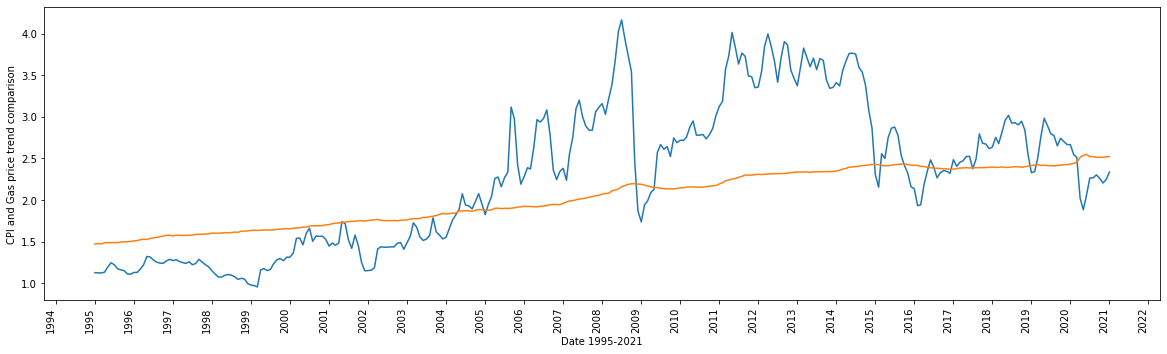

In [24]:
# Grab one oil type "all_grades_all_formulation" compare with CPI - when we divide CPI with 100
x_axis=cpi_gas_df["date"]
y1_axis=cpi_gas_df["all_grades_all_formulation"]
y2_axis=cpi_gas_df["CPI_scaled"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,y1_axis)
plt.plot(x_axis,y2_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("CPI and Gas price trend comparison")
locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()